Dataset - Dataset - https://www.kaggle.com/datasets/mexwell/yelp-review-dataset


In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import tensorflow as tf

In [2]:

df = pd.read_csv('test.csv')
df = df[['label', 'text']].copy()

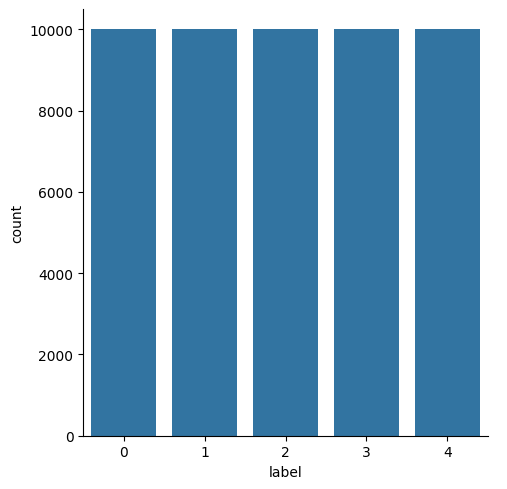

In [3]:
df.head
sb.catplot(x = 'label', kind = 'count', data = df)

In [4]:
i = np.random.rand(len(df)) < 0.8
train = df[i]
test = df[~i]
x_train = train['text']
y_train = train['label']
x_test = test['text']
y_test = test['label']


In [5]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras import layers, models
from keras.utils import to_categorical

num_labels = 5

batch_size = 128

# fit the tokenizer on the training data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train.text)

x_train = tokenizer.texts_to_matrix(train.text, mode='tfidf')
x_test = tokenizer.texts_to_matrix(test.text, mode='tfidf')

y_train_one_hot = to_categorical(y_train, num_classes= 5)
y_test_one_hot = to_categorical(y_test, num_classes= 5)
vocab_size = len(tokenizer.word_index)
# check shape
print("train shapes:", x_train.shape, y_train.shape)
print("test shapes:", x_test.shape, y_test.shape)
print("test first five labels:", y_test[:5])

In [6]:
# fit model
model = models.Sequential()
model.add(layers.Dense(10, kernel_initializer='normal', activation='relu'))
model.add(layers.Dense(5, kernel_initializer='normal', activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

history = model.fit(x_train, y_train_one_hot,
                    batch_size=batch_size,
                    epochs=30,
                    verbose = 1,
                    validation_split=0.1)

Epoch 1/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.3356 - loss: 1.4663 - val_accuracy: 0.5929 - val_loss: 1.0180
Epoch 2/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5938 - loss: 0.9856 - val_accuracy: 0.6124 - val_loss: 0.9385
Epoch 3/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6692 - loss: 0.8183 - val_accuracy: 0.6002 - val_loss: 0.9732
Epoch 4/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.7324 - loss: 0.6904 - val_accuracy: 0.5871 - val_loss: 1.0234
Epoch 5/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.7794 - loss: 0.5887 - val_accuracy: 0.5731 - val_loss: 1.1180
Epoch 6/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8164 - loss: 0.5031 - val_accuracy: 0.5676 - val_loss: 1.2096
Epoch 7/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8481 - loss: 0.4287 - val_accuracy: 0.5611 - val_loss: 1.3160
Epoch 8/30
281/281 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8685 - loss: 0.3705 - val_accuracy

In [7]:
score = model.evaluate(x_test, y_test_one_hot, batch_size=batch_size, verbose=0)
print('Accuracy: ', score[1])
pred = model.predict(x_test)
pred = tf.argmax(pred, axis=1)
print(pred[:10])
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('accuracy score: ', accuracy_score(y_test, pred))
from sklearn import metrics
print(metrics.classification_report(y_test, pred))
print("Confusion matrix:\n", metrics.confusion_matrix(y_test, pred))

Accuracy:  0.4794915020465851
315/315 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
tf.Tensor([3 0 2 1 0 4 3 4 0 1], shape=(10,), dtype=int64)
accuracy score:  0.479491508590724
              precision    recall  f1-score   support

           0       0.63      0.62      0.62      2006
           1       0.42      0.44      0.43      1973
           2       0.39      0.40      0.39      1996
           3       0.40      0.40      0.40      2073
           4       0.57      0.55      0.56      2021

    accuracy                           0.48     10069
   macro avg       0.48      0.48      0.48     10069
weighted avg       0.48      0.48      0.48     10069

Confusion matrix:
 [[1236  508  143   66   53]
 [ 458  860  477  107   71]
 [ 156  449  793  436  162]
 [  52  151  479  820  571]
 [  61   66  149  626 1119]]


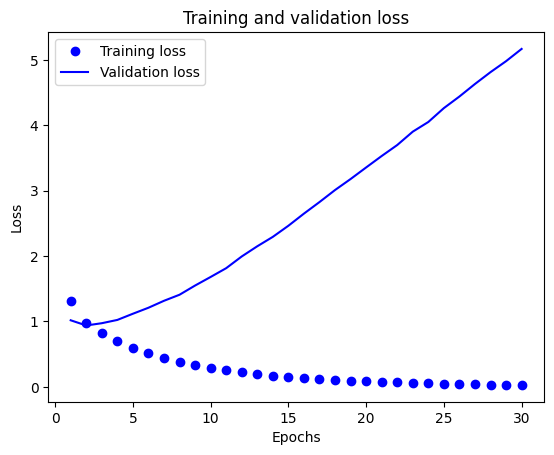

In [8]:
# plot the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

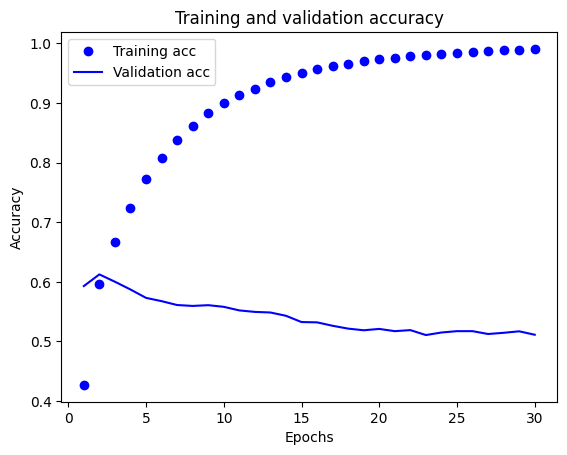

In [9]:
plt.clf()   # clear

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

The Sequential model is ok getting around 50% correct. This is higher than what would be expected of guessing as the data is equally distributed between all 5 classes. It is much better at guessing the extreme scores than in the middle.

In [10]:
from tensorflow.keras import preprocessing
x_train_processed = preprocessing.sequence.pad_sequences(x_train)
x_test_processed = preprocessing.sequence.pad_sequences(x_test)

In [28]:
cnn_model = models.Sequential()
cnn_model.add(layers.Embedding(vocab_size, 16)) 
cnn_model.add(layers.Conv1D(16, 5, activation='relu')) 
cnn_model.add(layers.MaxPooling1D(5)) 
cnn_model.add(layers.Conv1D(16, 5, activation='relu')) 
cnn_model.add(layers.GlobalMaxPooling1D())
cnn_model.add(layers.Dense(5, activation='softmax'))

cnn_model.summary()



Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [32]:
cnn_model.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
cnn_model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [33]:
history = cnn_model.fit(x_train_processed,
                    y_train_one_hot,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2,
                    verbose = 1)

Epoch 1/10


AbortedError: Graph execution error:

Detected at node StatefulPartitionedCall/gradient_tape/sequential_4_1/conv1d_8_1/convolution/Conv2DBackpropFilter defined at (most recent call last):
<stack traces unavailable>
Operation received an exception:Status: 5, message: could not create a primitive, in file tensorflow/core/kernels/mkl/mkl_conv_grad_filter_ops.cc:685
	 [[{{node StatefulPartitionedCall/gradient_tape/sequential_4_1/conv1d_8_1/convolution/Conv2DBackpropFilter}}]] [Op:__inference_one_step_on_iterator_44303]